In [1]:
import sys
sys.path.append('C:/Users/manya/Documents/Ironhack/Course/Final-project/src')
import CNN_model 
import os
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Model 1: Initial Dataset images (11 categories)

Plot the 11 categories from the initial data set of the Vegetable Image Dataset. 

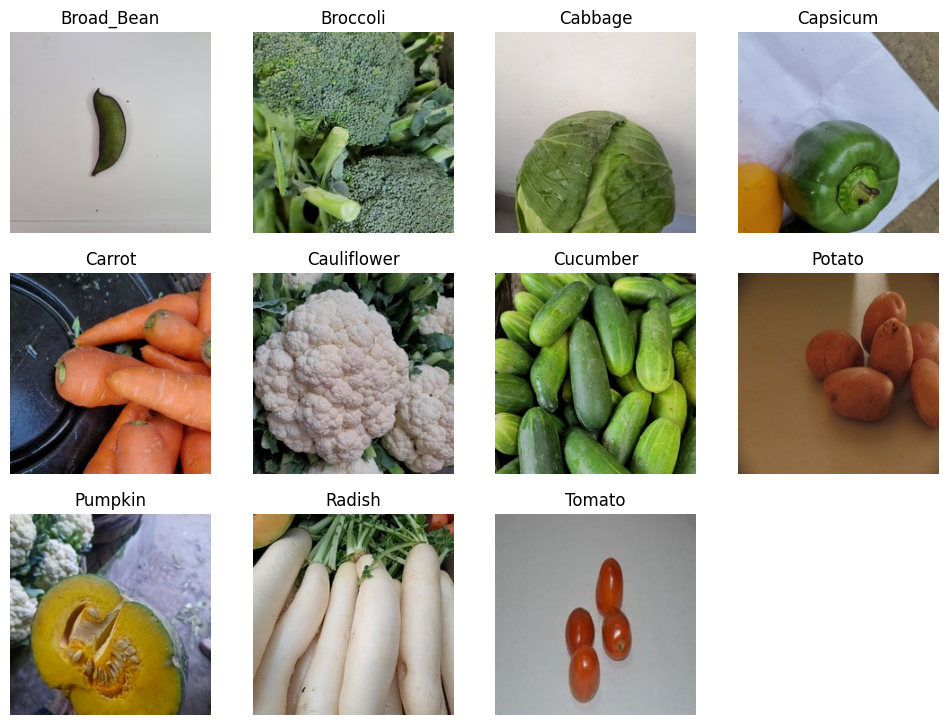

In [2]:
image_categories = os.listdir('C:/Users/manya/Documents/Ironhack/Course/Final-project/images/train') #Categories list
plot_categories = CNN_model.plot_images(image_categories, '../images/train/')
plot_categories.savefig('../graphs/m1_categories')

First is necessary to create the Data Image Generator that serves to provide batches for each set (training, validation and test) since sometimes is not possible to load a large set of images at once. This generator automatically loads the images, pre-processes them and returns the batches of images with their corresponding labels.

The parameters of the function 'flow_from_directory':
- Folders paths to train, validation and test 
- Target_size is the desired size (width pixels x height pixels) images will be resized to be all the same.It is worth noting that reducing the size of the images reduces the computational resources required to train the model, but may also result in a loss of information. Thus, the choice of target size depends on the characteristics of the data set and the requirements of the model. In this model, 150x150 is chosen compared to the original size of 224x224.
- Batch size is the number of images that are processed together in a single forward and backward pass instead of feeding the model with the entire dataset at once. Larger batch sizes will train faster and consume more memory, even though might show lower accuracy. In this model, 32 images will be processed before the model is updated. 


In [3]:
train_image_generator = CNN_model.Image_Data_Generator('../images/train/', (224,224), 32)

Found 11000 images belonging to 11 classes.


In [4]:
val_image_generator = CNN_model.Image_Data_Generator('../images/validation/', (224,224), 32)
test_image_generator = CNN_model.Image_Data_Generator('../images/test/', (224,224), 32)

Found 2200 images belonging to 11 classes.
Found 2200 images belonging to 11 classes.


### Model Creation 
The model will be created using the Keras API. First of all, the model is sequential since we 

In [23]:
model = CNN_model.model_creation([224,224,3],11)
model.save('../models/model_1.keras') 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 20)      560       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 20)      3620      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 20)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 50)      9050      
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 50)      22550     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 50)        0         
 g2D)                                                 

### Model Training 
First, the model is compiled using three parameters: 
- Optimizer: 
- Loss:
- Metrics:

Moreover, an Earky Stopping callback is set up with a patience of 5 meaning that if there's no improvement in the validation loss for 5 epochs the training will stop. 

Then, the model is trained setting up 100 epochs, which is the total number of iterations of all the training data in one cycle for training. 

In [6]:
history = CNN_model.train_model(model, train_image_generator, val_image_generator)


Epoch 1/10
344/344 [==============================] - 31193s 91s/step - loss: 0.8544 - accuracy: 0.7178 - val_loss: 0.4667 - val_accuracy: 0.8409
Epoch 2/10
344/344 [==============================] - 872s 3s/step - loss: 0.3428 - accuracy: 0.8906 - val_loss: 0.2706 - val_accuracy: 0.9245
Epoch 3/10
344/344 [==============================] - 593s 2s/step - loss: 0.1621 - accuracy: 0.9485 - val_loss: 0.2203 - val_accuracy: 0.9414
Epoch 4/10
344/344 [==============================] - 563s 2s/step - loss: 0.1174 - accuracy: 0.9644 - val_loss: 0.3102 - val_accuracy: 0.9255
Epoch 5/10
344/344 [==============================] - 856s 2s/step - loss: 0.0976 - accuracy: 0.9704 - val_loss: 0.3054 - val_accuracy: 0.9277
Epoch 6/10
344/344 [==============================] - 1127s 3s/step - loss: 0.0584 - accuracy: 0.9808 - val_loss: 0.3434 - val_accuracy: 0.9341
Epoch 7/10
344/344 [==============================] - 870s 3s/step - loss: 0.0484 - accuracy: 0.9849 - val_loss: 0.4361 - val_accuracy: 0.

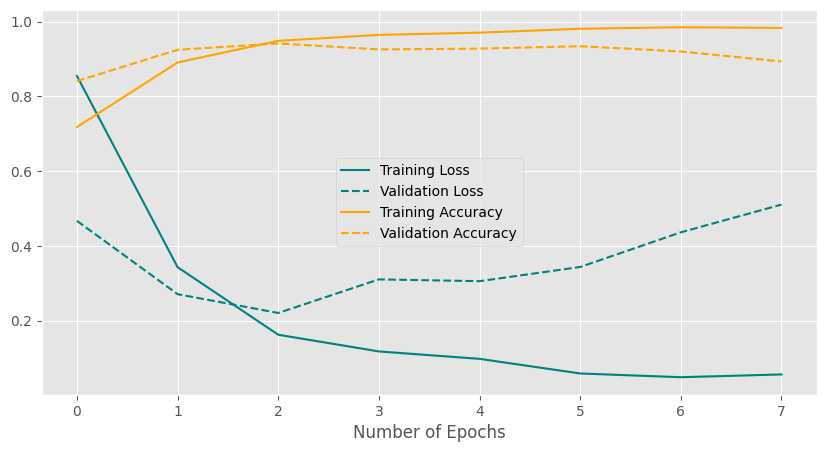

In [7]:
performance_metrics = CNN_model.plot_trainig_metrics(history)
performance_metrics.savefig('../graphs/m1_performance')

In [8]:
model.evaluate(test_image_generator)

69/69 [==============================] - 116s 2s/step - loss: 0.4917 - accuracy: 0.8977


[0.4917130470275879, 0.8977272510528564]

In [9]:
predictions = model.predict(test_image_generator)

69/69 [==============================] - 34s 480ms/step


In [10]:
predicted_classes = np.argmax(predictions,axis=1)

In [11]:
predicted_classes

array([10,  4,  7, ...,  8,  8,  1], dtype=int64)

In [12]:
true_classe = test_image_generator.classes

In [13]:
class_labels = list(test_image_generator.class_indices.keys())   

In [14]:
report = metrics.confusion_matrix(true_classe,predicted_classes)

In [15]:
report

array([[19, 17, 14, 11, 26, 25, 15, 17, 18, 17, 21],
       [16, 19, 16, 20, 19, 21, 15, 15, 19, 16, 24],
       [18, 12, 18, 18, 15, 26, 15, 16, 20, 17, 25],
       [20, 15, 23, 11, 22, 27, 17, 17, 16, 19, 13],
       [15, 14, 16, 25, 19, 25, 15, 15,  9, 22, 25],
       [11, 22, 16, 18, 17, 27, 13, 24, 18, 13, 21],
       [13, 14, 22, 18, 22, 29, 17, 12, 14, 22, 17],
       [15, 19, 19, 26, 19, 16, 16, 15, 18, 28,  9],
       [17, 15, 16, 18, 19, 28, 11, 18, 20, 15, 23],
       [26, 12, 20, 17, 20, 18, 15, 14, 19, 19, 20],
       [25, 15, 14, 16, 26, 24, 14, 24, 17, 11, 14]], dtype=int64)

In [16]:
# Crear una matriz de confusión vacía 
num_clases = 11
matriz_confusion = [[0] * num_clases for _ in range(num_clases)]

# Iterar sobre los valores reales y predichos y actualizar la matriz de confusión
for valor_real, valor_predicho in zip(true_classe, predicted_classes):
    matriz_confusion[valor_real][valor_predicho] += 1

print(matriz_confusion)

[[19, 17, 14, 11, 26, 25, 15, 17, 18, 17, 21], [16, 19, 16, 20, 19, 21, 15, 15, 19, 16, 24], [18, 12, 18, 18, 15, 26, 15, 16, 20, 17, 25], [20, 15, 23, 11, 22, 27, 17, 17, 16, 19, 13], [15, 14, 16, 25, 19, 25, 15, 15, 9, 22, 25], [11, 22, 16, 18, 17, 27, 13, 24, 18, 13, 21], [13, 14, 22, 18, 22, 29, 17, 12, 14, 22, 17], [15, 19, 19, 26, 19, 16, 16, 15, 18, 28, 9], [17, 15, 16, 18, 19, 28, 11, 18, 20, 15, 23], [26, 12, 20, 17, 20, 18, 15, 14, 19, 19, 20], [25, 15, 14, 16, 26, 24, 14, 24, 17, 11, 14]]


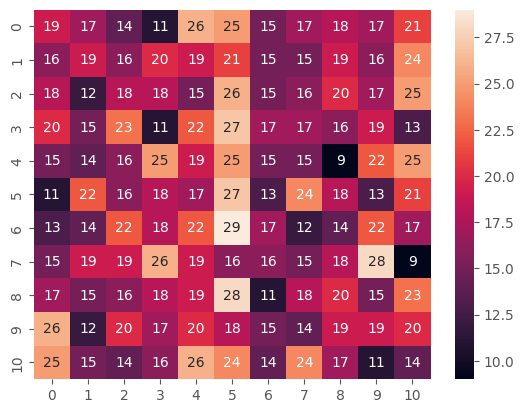

In [22]:
confusion_matrix_model1 = sns.heatmap(report,annot=True)
plt.savefig('../graphs/m1_confusion_matrix.png')


No funciona el modelo 1!!!!!